In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import variation

In [15]:
wh=pd.read_excel('D:\\ANALYTICS\\GREAT LEARNING\\7.Statistical Method for Decisoin Making-Week-4\\Wholesale customers data-1.xlsx',
                 sheet_name='Wholesale customers data')

# Problem 1:

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale customers data.xlsx) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

In [11]:
#1.1. Use methods of descriptive statistics to summarize data. 
#Which Region and which Channel seems to spend more? 
#Which Region and which Channel seems to spend less?
wh.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


We could see 2 Categorical(Channel and Region) and 7 Conitnuous variables

In [10]:
wh.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


.........................

Descriptive Statistics :

In [11]:
wh.describe(include='all')

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


There are 2 and 3 unique values for Channel and Region respectively.

We could see Fresh shows highest standard deviation among the continuous variables,
value being 12647.32

Mean for Fresh=12000.29

Mean for Milk=5796.26.

Mean for Grocery=7951.27.

Mean for Frozen=3071.93.

Mean for Detergents paper=2881.49.

Mean for Delicatessen=1524.87.

.................

In [13]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.0+ KB


There are no null value across the variables in the dataset

.........

In [44]:
wh1=wh
wh1['Total']=wh['Fresh']+wh['Milk']+wh['Grocery']+wh['Frozen']+wh['Detergents_Paper']+wh['Delicatessen']

In [45]:
wh1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [46]:
#Region and channel spending more
wh1.groupby(['Region','Channel'])['Total'].sum().reset_index(name='Total').sort_values(by='Total',ascending=False).head(1)

,Region,Channel,Total
4,Other,Hotel,5742077


Other Region of Channel Hotel spends more

.......

In [47]:
#Region and channel spending less
wh1.groupby(['Region','Channel'])['Total'].sum().reset_index(name='Total').sort_values(by='Total').head(1)

,Region,Channel,Total
2,Oporto,Hotel,719150


Whereas Oporto Region via Channel Hotel spends less

........

In [37]:
#1.2. There are 6 different varieties of items are considered. 
#Do all varieties show similar behaviour across Region and Channel?
pd.pivot_table(wh,index=['Region','Channel'])

Buyer/Spender  Delicatessen  Detergents_Paper         Fresh  \
Region Channel                                                                
Lisbon Hotel       237.728814   1197.152542        950.525424  12902.254237   
       Retail      226.055556   1871.944444       8225.277778   5200.000000   
Oporto Hotel       321.000000   1105.892857        482.714286  11650.535714   
       Retail      311.105263   1239.000000       8410.263158   7289.789474   
Other  Hotel       227.582938   1518.284360        786.682464  13878.052133   
       Retail      152.438095   1826.209524       6899.238095   9831.504762   

                     Frozen       Grocery          Milk         Total  
Region Channel                                                         
Lisbon Hotel    3127.322034   4026.135593   3870.203390  26073.593220  
       Retail   2584.111111  18471.944444  10784.000000  47137.277778  
Oporto Hotel    5745.035714   4395.500000   2304.250000  25683.928571  
       Retail   1540.578947  16326.315789   9190.789474  43996.736842  
Other  Hotel    3656.900474   3886.734597   3486.981043  27213.635071  
       Retail   1513.200000  15953.809524  10981.009524  47004.971429

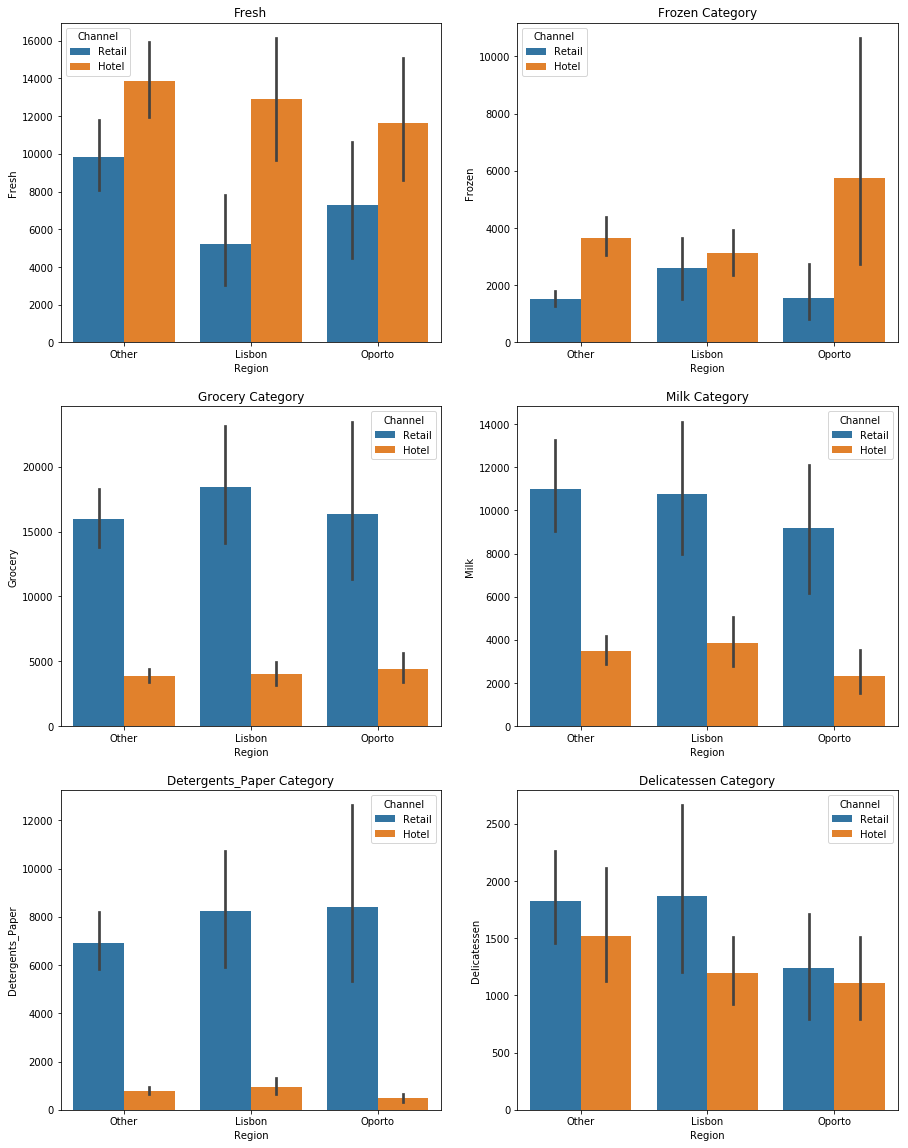

In [87]:
fig,ax=plt.subplots(nrows=3,ncols=2,sharey=False,sharex=False,figsize=(15,20))
sns.barplot(x='Region',y='Fresh',data=wh,hue='Channel',ax=ax[0,0])
ax[0,0].title.set_text('Fresh')


sns.barplot(x='Region',y='Frozen',data=wh,hue='Channel',ax=ax[0,1])
ax[0,1].title.set_text('Frozen Category')


sns.barplot(x='Region',y='Grocery',data=wh,hue='Channel',ax=ax[1,0])
ax[1,0].title.set_text('Grocery Category')


sns.barplot(x='Region',y='Milk',data=wh,hue='Channel',ax=ax[1,1])
ax[1,1].title.set_text('Milk Category')


sns.barplot(x='Region',y='Detergents_Paper',data=wh,hue='Channel',ax=ax[2,0])
ax[2,0].title.set_text('Detergents_Paper Category')


sns.barplot(x='Region',y='Delicatessen',data=wh,hue='Channel',ax=ax[2,1])
ax[2,1].title.set_text('Delicatessen Category')


We could see Detergents_Paper,Delicatessen,Grocery and Milk categories has highest spending on Retail Channel on all Regions

while Fresh and Frozen categories has highest spending Hotel Channel on all Regions

There are variation in spending on each varieties across Region and Channel

..........

In [62]:
#1.3. On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour? 
#Which items shows the least inconsistent behaviour?
wh.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [88]:
#standard deviation
wh.std()     

Buyer/Spender         127.161315
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [89]:
#IQR
Q3=wh.quantile(0.75)
Q1=wh.quantile(0.25)
Q3-Q1

Buyer/Spender         219.50
Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicatessen         1412.00
dtype: float64

In [90]:
#Range
mx=wh.max(numeric_only=True) 
mn=wh.min(numeric_only=True) 
mx-mn

Buyer/Spender          439
Fresh               112148
Milk                 73443
Grocery              92777
Frozen               60844
Detergents_Paper     40824
Delicatessen         47940
dtype: int64

From the above measure of variablity we could see Fresh Category showing highest amount of variation 

and Delicatessen shows least amount of variation

.......

In [92]:
#1.4. Are there any outliers in the data?
IQR=Q3-Q1
out=((wh1.iloc[:,3:]<(Q1-1.5*IQR)) | (wh1.iloc[:,3:]>(Q3+1.5*IQR))).sum()
out

Buyer/Spender        0
Delicatessen        27
Detergents_Paper    30
Fresh               20
Frozen              43
Grocery             24
Milk                28
Total               20
dtype: int64

All categories show various number of outliers,yes outliers are present in data

In [91]:
#1.5. On the basis of this report, what are the recommendations?

We were able to see Oporto region of Channel Hotel has less customer spending, we can improve by increasing quality sales on 

Fresh and Frozen type Category which are the 2 categories dominating Hotel spending

Fresh Category shows highest variation,variability can be reduced on concentrating on increasing the sales on Retail channel as well 